# Partiel EDA décembre 2018
### HETIC MD4 - Promotion 2020
### Cyril BECRET

In [1]:
# Importation des librairies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Découverte des données

In [2]:
# Importation des données

df = pd.read_csv('./dataset.csv', index_col=0)

In [3]:
# Vérification de l'import et affichage des premières lignes

df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
# Correction du nom de colonne "usd pledged" en "usd_pledged" pour faciliter la suite de l'étude :

df.rename(columns = {'usd pledged':'usd_pledged'}, inplace = True)

In [5]:
# Affichage des informations sur le dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd_pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 43.3+ MB


Le dataset est composé de 378661 entrées qui contiennent 14 colonnes.

Les colonnes possèdent 3 structures de données différentes, à savoir :
* object pour ['name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'country']
* float64 pour ['goal', 'pledged', 'usd_pledged', 'usd_pledged_real', 'usd_goal_real']
* int64 pour ['backers']

Concernant les structures de données "object", il s'agit d'enregistrements de textes.

Il est intéressant de noter parmi celles-ci que les colonnes 'deadline' et 'launched' font référence à des dates au format ISO et pourront donc être traitées comme des données numériques pour y calculer des intervales.


In [6]:
# Affichage des valeurs de répartition du dataset

df.describe()

,goal,pledged,backers,usd_pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


### 1.1 Recherche des valeurs dupliquées

In [7]:
# Recherche de duplicats

df.duplicated().sum()

0

Aucune valeur dupliquée n'est présente dans ce dataset

### 1.2 Gestion des valeurs manquantes 

In [8]:
# Recherche de valeurs manquantes

df.isna().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd_pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Il manque 4 noms et 3797 valeurs pour 'usd_pledged'.

#### Commençons par vérifier les 4 entrées sans nom :

In [9]:
# Affichage des lignes dont le nom est manquant

df[df.name.isna()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


Nous constatons que ces entrées ont effectivement des valeurs pour le reste de leurs colonnes.

Les 2 premières et la dernière ont un statut en failed et peu d'investisseurs, néanmoins elles semblent bien avoir été lancées et leurs données seront donc conservées pour la suite de l'étude même si elles ne possèdent pas de nom.

Concernant la 3e de catégorie Design, elle a un statut en suspended et aucun investisseur. Il s'agit peut-être d'une erreur d'enregistrement et le projet a été suspendu pour l'annuler. Cette dernière entrée va donc être retirée du dataset pour éviter de fausser l'étude sur les vrais projets.

In [10]:
# Suppression de la ligne 648853978 qui ne semble pas entrer dans le cadre de cette étude

df = df.drop(648853978)

#### Regardons maintenant les entrées où usd_pledged n'est pas renseigné

In [11]:
# Affichage des 5 premières lignes du dataset

df[df.usd_pledged.isna()].head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00


Ces lignes semblent contenir certaines informations, mais étrangement, les states semblent "undefined", le country indique N,0" et le nombre d'investisseurs nul. Vérifions ces informations sur l'ensemble des lignes concernées.

In [12]:
# Calcul de la répartition des statuts pour les lignes où la valeur usd_pledged est manquante

df[df.usd_pledged.isna()]['state'].value_counts()

undefined     3562
successful     105
failed         105
canceled        22
suspended        2
live             1
Name: state, dtype: int64

Le statut de ces valeurs sont pour la plus part undefined mais les autres types sont tout de même présent.

Vérifions ce qu'il en est pour les colonnes country et backers.

In [13]:
# Calcul de la répartition des pays pour les lignes où la valeur usd_pledged est manquante

df[df.usd_pledged.isna()]['country'].value_counts()

N,0"    3797
Name: country, dtype: int64

In [14]:
# Calcul de la répartition du nombre d'investisseurs pour les lignes où la valeur usd_pledged est manquante

df[df.usd_pledged.isna()]['backers'].value_counts()

0    3797
Name: backers, dtype: int64

Pour l'ensemble de ces données, le pays d'origine semble étrange, à savoir **N,0"**.

De plus, le nombre d'investisseurs est systématiquement nul.

Ces lignes semblent donc éronnées. (peut-être des entrées de tests toujours présentes dans la base mais non affichées sur le site).

Puisque nous n'avons pas d'autres informations à leurs sujets et pour éviter de fausser le reste de l'étude, l'ensemble de ces données seront retirées du dataset.
Cette décision est acceptable vu la proportion faible qu'elles représentent face à la taille du dataset initial (environ 1% des entrées).

In [15]:
# Suppression des entrées suspectes

df.dropna(subset=['usd_pledged'], inplace=True)

### 1.3 Recherche d'éventuels outliers

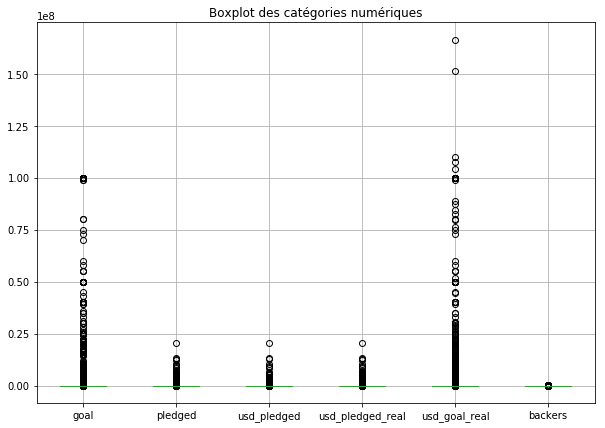

In [16]:
# Affichage du boxplot des catégories numériques

df.boxplot(['goal', 'pledged', 'usd_pledged', 'usd_pledged_real', 'usd_goal_real', 'backers'], figsize=(10,7))
plt.title('Boxplot des catégories numériques')
plt.show()

La majorité des valeurs ont un ordre de grandeur semblable. Vérifions tout de même les valeurs extrêmes avec par exemple les lignes dont l'objectif est plus grand que 100 millions de dollars.

In [17]:
# Recherche des lignes avec un objectif dépassant 100 millions de dollars

df[df['usd_goal_real'] > 100000000]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1243678698,FUCK Potato Salad. Paleo Potato Brownies!,Food,Food,GBP,2014-08-08,99000000.0,2014-07-09 00:24:34,0.0,failed,0,GB,0.00,0.00,1.663614e+08
2000749004,A Celtic Lovestory,Drama,Film & Video,GBP,2015-11-30,100000000.0,2015-11-17 00:47:15,0.0,failed,0,GB,0.00,0.00,1.513959e+08
2132015082,DER NEANDERTALER (Kinofilm mit Starbesetzung i...,Movie Theaters,Film & Video,EUR,2017-03-14,100000000.0,2017-01-13 20:08:41,36.0,failed,2,DE,1.06,38.65,1.073699e+08
219702078,Kitchen from Austria in Switzerland,Restaurants,Food,CHF,2015-10-05,100000000.0,2015-08-06 19:12:10,0.0,failed,0,CH,0.00,0.00,1.040572e+08
944541075,Hydroponic's Skyscraper(un gratte-ciel hydropo...,Technology,Technology,EUR,2015-10-24,100000000.0,2015-08-25 23:52:30,2.0,failed,2,FR,2.29,2.20,1.101698e+08


Ces projets semblent tous bien fantaisistes vu leurs noms, leurs objectifs et le nombre de contributions.
(Une étude similaire sur les outliers de 'goal' ont confirmé l'idée de projets fantaisistes : **df[df['goal'] > 90000000]** )

Néanmoins, elles permettent de refléter la non réussite de ces projets trop extravagants et on les gardera donc dans l'étude pour l'instant.

_Il pourrait y avoir là une piste d'amélioration pour un futur modèle prédictif en traitant mieux ces données extrèmes mais ce n'est pour le moment pas le but de notre analyse_

## 2. Enrichissement des features

#### 2.1 Colonnes 'category' et 'main_category'

In [18]:
# Affichage des 'main category' disponibles et le nombre d'entrées de chacunes

df.main_category.value_counts()

Film & Video    62697
Music           49530
Publishing      39379
Games           35226
Technology      32562
Design          30066
Art             28153
Food            24599
Fashion         22812
Theater         10912
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: main_category, dtype: int64

La colonne 'main_category' possède 15 valeurs possible dans ce dataset. Nous étudierons donc celle-ci plutôt que la colonne 'category' qui possède énormément de valeurs distinctes.

#### 2.2 Devises utilisées pour les valeurs d'objectifs et de récoltés

Les colonnes 'goal' et 'pledged' sont stockés en utilisant la monnaie locale comme devise.

Par chance, la conversion de celles-ci en dollars a déjà été faite et correspond aux colonnes 'usd_goal_real' et 'usd_pledged_real'.

Ce seront donc ces deux colonnes qui seront utilisée pour pouvoir comparer toutes les entrées du dataset. La colonne devise pourra être utilisée également pour savoir si un projet a plus de chance d'aboutir pour une devise particulière

In [19]:
# Nombre d'enregistrements du dataset pour chaque devises

df.currency.value_counts()

USD    292626
GBP     33672
EUR     17219
CAD     14756
AUD      7839
SEK      1757
MXN      1752
NZD      1447
DKK      1113
CHF       761
NOK       708
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

#### 2.3 Interval de disponibilité du projet

Puisque nous disposons de la date de début du projet ainsi que de sa deadline, nous pouvons calculer une nouvelle feature qui représentera le temps total de disponibilité d'une campagne Kickstarter.

Pour faciliter ce calcul, nous allons représenter cette nouvelle colonne en nombre de jours en faisant la soustraction de la date de fin par la date de début. Cette feature sera de type <int> et arrondira donc au jour près les valeurs.

In [20]:
# Ajout d'une nouvelle feature donnant l'interval entre la date de début et la date de fin d'un projet

df['days_availability'] = (pd.to_datetime(df['deadline']) - pd.to_datetime(df['launched'])).dt.days

#### 2.4 Moyenne du montant d'investissement par contributeur

Nous allons désormais calculer une nouvelle feature pour chaque entrée, à savoir la moyenne du montant d'investissement par contributeur

In [21]:
# Calcul de la valeur moyenne d'investissement par contributeur

df['pledge_by_backer'] = df['usd_pledged_real'] / df['backers']

# Lorsqu'aucun investisseur n'a contribué au projet, on fixe cette valeur à 0 pour contourner la division par 0.
df['pledge_by_backer'].fillna(0, inplace=True)

#### 2.5 Moyenne du montant d'investissement par jour

Utilisons la nouvelle feature 'days_availability' pour calculer la moyenne des investissements par jour pour chaque projets

In [22]:
# Calcul de la moyenne d'investissement par jour

df['pledge_by_day'] = df['usd_pledged_real'] / df['days_availability']

#### 2.6 Valeurs en pourcentage pour ces nouvelles features

Pour se faire une meilleure idée de l'impact de ces montants par contributeurs et par jours, nous allons les diviser par le montant total de l'objectif du projet afin de voir de quel pourcentage les investisseurs participent, et de quel pourcentage le projet avance chaque jour

In [23]:
# Calcul de la valeur moyenne d'investissement par contributeur en pourcentage

df['pledge_by_backer_percent'] = df['pledge_by_backer'] / df['usd_goal_real'] * 100

# Calcul de la valeur moyenne d'investissement par jour en pourcentage

df['pledge_by_days_percent'] = round(df['pledge_by_day'] / df['usd_goal_real'] * 100)

df

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,days_availability,pledge_by_backer,pledge_by_day,pledge_by_backer_percent,pledge_by_days_percent
ID,,,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,58,0.000000,0.000000,0.000000,0.0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,59,161.400000,41.033898,0.538000,0.0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,44,73.333333,5.000000,0.162963,0.0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,29,1.000000,0.034483,0.020000,0.0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,55,91.642857,23.327273,0.469963,0.0
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,34,233.816964,1540.441176,0.467634,3.0
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,19,75.312500,63.421053,7.531250,6.0
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,44,11.325000,10.295455,0.045300,0.0
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,34,141.948276,242.147059,0.113559,0.0


#### 2.7 Gestion booléenne de la réussite

Enfin, nous pouvons regrouper les statuts de fin de projet afin de déterminer si c'est un succès (True) ou une des différentes causes d'échec (False) afin de bien distinguer ces deux cas

In [24]:
# Ajout d'une feature 'success' pour savoir si le projet a été couronné de succès sous forme de booléen

df['success'] = df['state'] == 'successful'

### 3. Analyse univariée du dataset

#### 3.1 Analyse de la proportion de projets réussis

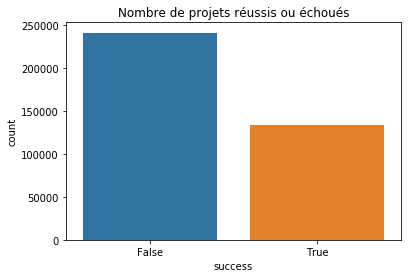

In [25]:
# Analyse du nombre de projets réussis de manière générale

sns.countplot(df['success'])
plt.title('Nombre de projets réussis ou échoués')
plt.show()

In [26]:
# Calcul du pourcentage de projets réussis

number_success = df[df['success']]['success'].count()
percent_success = round(number_success / df.shape[0] * 100)

print(f"\nNous avons donc {number_success} projets ayant réussi leurs campagnes Kickstarter.\nCela représente {percent_success}% de réussite sur un total de {df.shape[0]} projets.")


Nous avons donc 133851 projets ayant réussi leurs campagnes Kickstarter.
Cela représente 36.0% de réussite sur un total de 374863 projets.


#### 3.2 Analyse de la proportion de projets réussis par catégories

Regardons si la répartition de la réussite d'un projet diffère entre les différentes catégories.

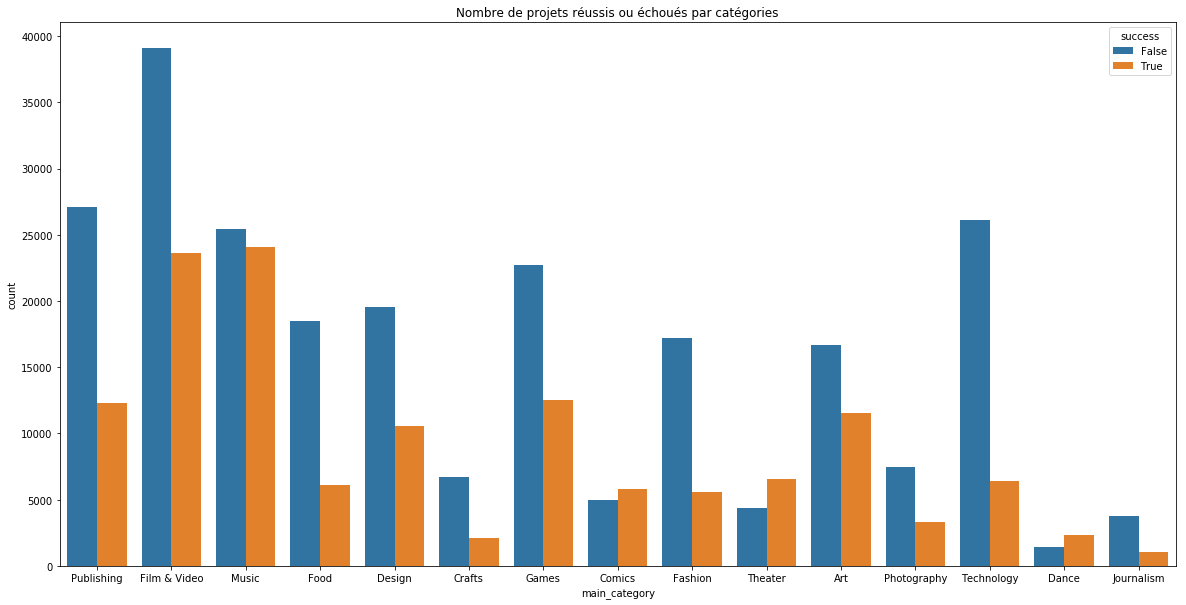

In [27]:
# Analyse de la réussite en fonction de la catégorie principale du projet

plt.figure(figsize=(20,10))
sns.countplot(df['main_category'], hue=df['success'])
plt.title('Nombre de projets réussis ou échoués par catégories')

plt.show()

Nous constatons que toutes les catégories n'ont pas le même taux de réussite de leurs campagnes Kickstarter.

Ainsi, les projets de ces catégories sortent du lot :
* ['Music', 'Comics', 'Theater', 'Dance'] ont une meilleur proportion de réussite.
* ['Publishing', 'Food', 'Design', 'Crafts', 'Games', 'Fashion', 'Technology'] ont une moins bonne proportion de réussite.

#### 3.3 Analyse de la proportion de projets réussis par pays

Regardons si la répartition de la réussite d'un projet diffère entre les différents pays.

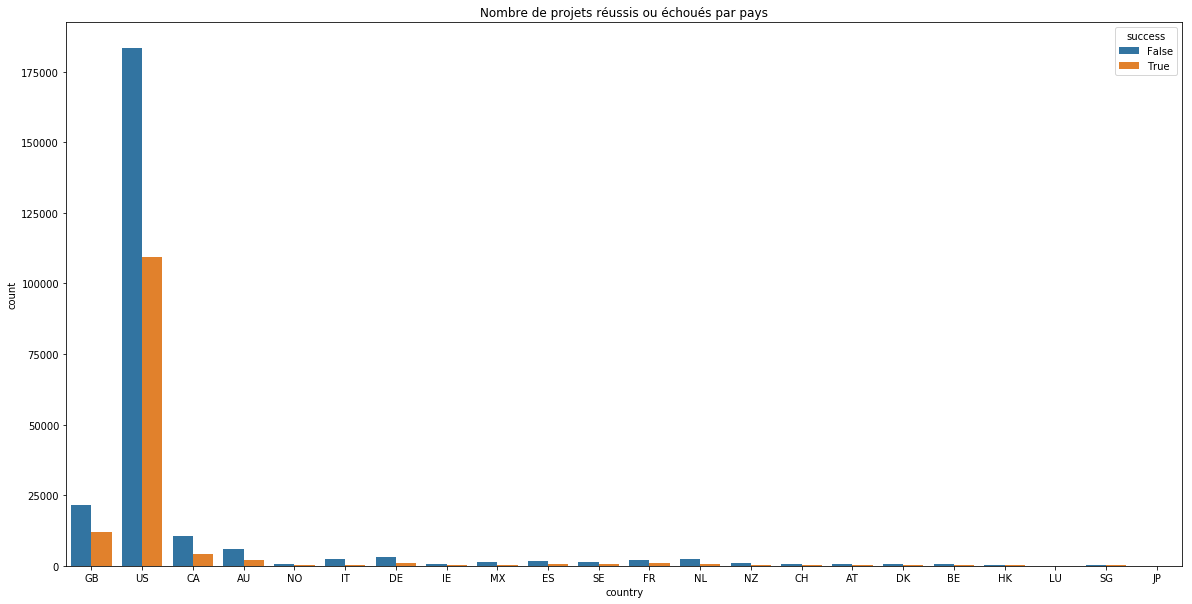

In [28]:
# Analyse de la réussite en fonction de la localisation du projet

plt.figure(figsize=(20,10))
sns.countplot(df['country'], hue=df['success'])
plt.title('Nombre de projets réussis ou échoués par pays')

plt.show()

La proportion de réussite ne semble pas différer en fonction du pays dans lequel le projet est lancé. Cette Feature ne sera donc pas retenue pour la recherche d'un modèle prédictif.

#### 3.4 Analyse de la proportion de projets réussis en fonction de la durée de disponibilité du projet

Regardons si la durée de disponibilité d'un projet a un impact sur sa réussite

/Users/cbcrt/Library/Python/3.7/lib/python/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


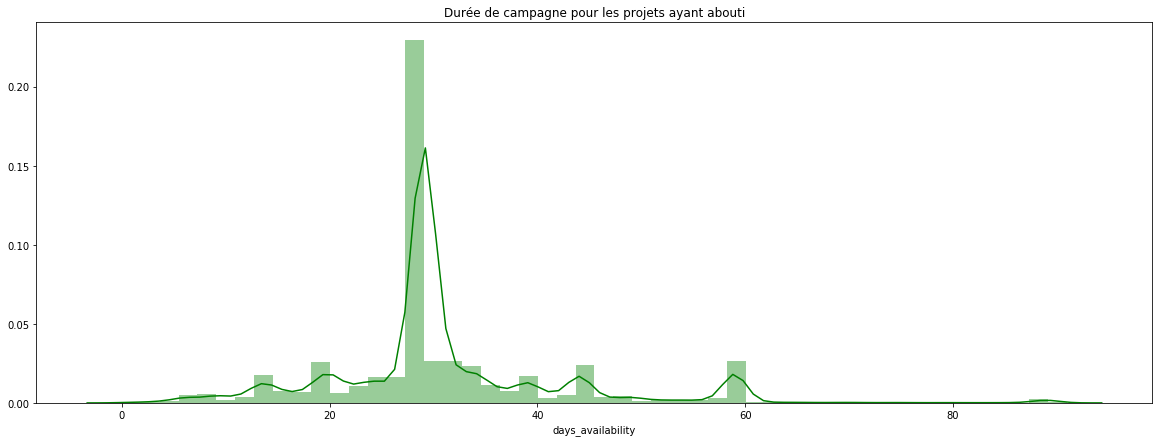

In [29]:
# Analyse de la durée des campagnes Kickstarter parmis celles ayant atteint leur objectif

plt.figure(figsize=(20, 7))
fig = sns.distplot(df[df['success'] == True ]['days_availability'], color='g')
fig.set_title('Durée de campagne pour les projets ayant abouti')

plt.show()

Nous constatons que la majorité des campagnes Kickstarter ayant abouti avaient une durée d'ouverture situé entre 10 et 60 jours, avec un maximum aux environs de 1 mois de campagne.

### 4. Analyse multivariée du dataset

#### 4.1 Ajout d'un pourcentage de réussite

Afin de savoir à quel point un projet a été financé, nous ajoutons une feature 'completion' qui sera le quotient du montant investi par le montant total souhaité.

Ainsi, un projet terminé aura une completion de 100% ou plus, et les autres pourront être quantifiés afin de savoir s'ils étaient proche de la réussite ou non.

In [30]:
# Ajout du pourcentage de complétion

df['completion'] = round(df['usd_pledged_real'] / df['usd_goal_real'])

Il est possible de bloquer la valeur de completion à 100% avec **df[df['completion'] > 100] = 100**
Néanmoins, nous allons autoriser des valeurs au delà de 100% pour avoir une vision de projets ayant un fort succès et ayant récolté un montant d'investissement bien supérieur à l'objectif de départ.

#### 4.2 Recherche de correlations entre les features

Text(0.5, 1.0, 'Heatmap de correlations entre les features du dataset')

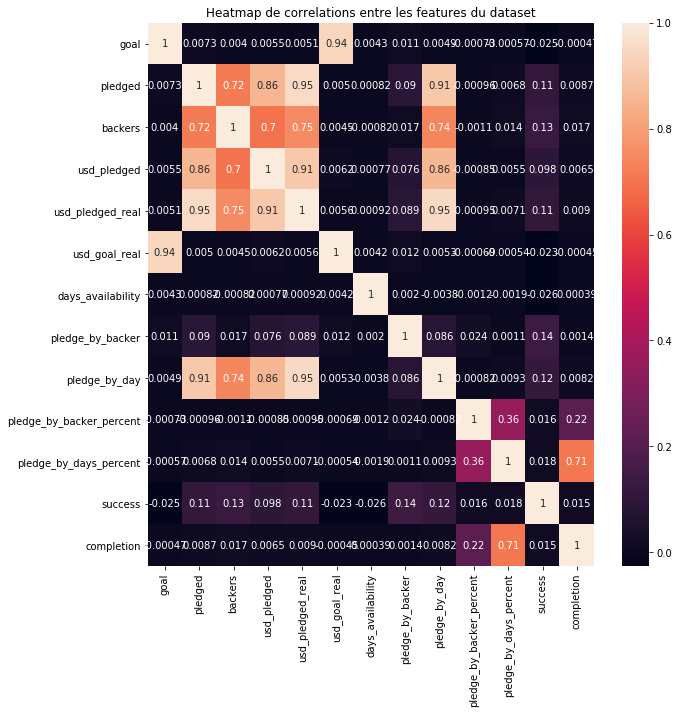

In [31]:
# Recherche de correlations entre features

plt.figure(figsize=(10, 10))
fig = sns.heatmap(df.corr(), annot=True)
fig.set_title('Heatmap de correlations entre les features du dataset')

Nous constatons que certaines features sont fortement correlées.

Il s'agit de correlations deux à deux entre ces différentes features :
* 'pledge_by_day'
* 'pledged'
* 'backers'
* 'usd_pledged'
* 'usd_pledged_real'

Nous allons donc pouvoir réduire notre dataset en regroupant ces colonnes pour la suite de notre étude.
Ainsi, nous allons conserver le montant de pledge_by_day_percent qui résumera ces features.

On en profitera pour retirer les colonnes jugées moins importantes dans le début de cette étude pour faciliter la découverte d'un modèle associé à ces données.

__De plus, nous constatons une belle correlation entre la feature de 'completion' qui sera notre indicateur du degré de succès d'un projet avec la 'pledge_by_days_percent' que nous avons introduit précédemment et qui serait un bon indice pour déterminer de la réussite ou non d'un projet.__

In [32]:
# Réduction du dataset pour conserver les features importantes

df_reduce = df.drop(columns = ['category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'country', 'goal', 'pledged', 'backers', 'usd_pledged'])

#### 4.2  Analyse de la contribution moyenne par jour en pourcentage du total

Text(0.5, 1.0, 'Contribution moyenne par jour en pourcentage en fonction du taux de complétion')

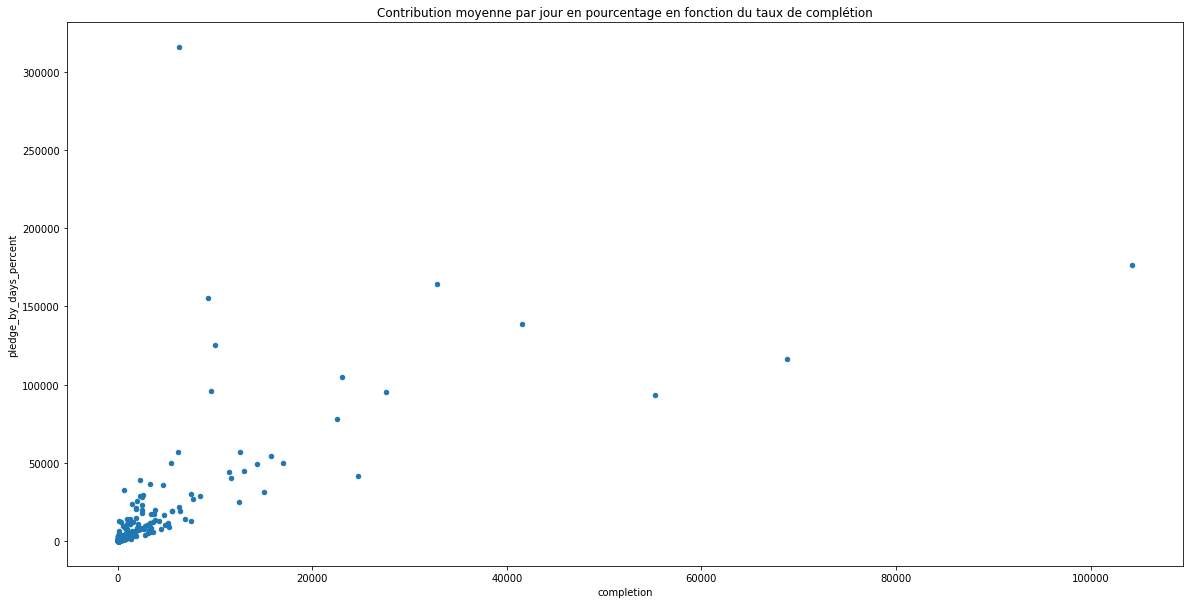

In [33]:
# sns.jointplot(x='pledge_by_days_percent', y='completion', data=df_reduce, kind='hex')

df_reduce.plot.scatter(x='completion', y='pledge_by_days_percent', figsize=(20,10))
plt.title("Contribution moyenne par jour en pourcentage en fonction du taux de complétion")


Nous constatons effectivement une certaine corrélation entre investissement moyen par jour en pourcentage du total et taux de complétion.

## 5. Conclusion


* Ce dataset a permis de découvrir des correlations entre ses différentes données qui pourront être utilisées dans la construction d'un modèle prédictif afin de prédire de la réussite ou non d'un projet Kickstarter en fonction de ses données.


* Nous avons ainsi vu que la catégorie d'un projet joue un rôle important puisque les catégories Music, Comics, Theater, et Dance ont un bien meilleur taux de réussite que les projets de catégories Publishing, Food, Design, Crafts, Games, Fashion ou Technology.


* De même, il semblerait que la majorité des projets ayant réussi leur campagne Kickstarter avaient une durée d'ouverture de moins de 2 mois. Les projets plus long, souvent plus ambitieux, avaient une moins bonne réussite d'après les précédentes observations.


* Enfin, certains calculs de nouvelles features ont montré une forte correlation avec le pourcentage de complétion précédemment défini. Ainsi, la contribution moyenne par jour en pourcentage s'avère être un bon indicateur de la réussite d'une campagne. Un facteur de ce type, que l'on pourra essayer de corréler encore avec d'autres features, pourra être un bon paramètre pour un algorithme de recherche de modèle prédictif.


* L'analyse multivariée aurait pu être approfondie pour améliorer l'étude de cet EDA, malheureusement la taille du dataset ne me permettait pas une telle analyse sur ma station de travail. Il aurait été possible de choisir un échantillon réduit pour y effectuer celle-ci et contourner le problème. Une gestion plus dure des outliers possédant des valeurs extrèmes aurait pu réduire ce nombre pour n'étudier que les sujets "crédibles".